In [3]:
### import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [4]:
mid2 = pd.read_csv('중1 코호트 청소년_데이터.csv',encoding='cp949')

In [5]:
mid2.columns= ['가구 ID','개인 ID','조사참여 여부: 청소년','시/도(학교 기준)','도시규모(학교 기준)','시/도(거주지 기준)','성별','부모관계1','부모관계2','무능력1','무능력2','무능력3','반감1', '반감2','반감3', '냉담1','냉담2', '탈진1','탈진2','탈진3', '탈진4','학업소진13', '학업소진 14','학업소진15', '학업소진16','자아존중감1','자아존중감2','자아존중감3','자아존중감4','자아존중감5','자아존중감6','자아존중감7','자아존중감8','자아존중감9','자아존중감10','주의집중1','주의집중2','주의집중3','주의집중4','주의집중5','주의집중6','주의집중7','우울1','우울2','우울3','우울4','우울5','우울6','우울7','우울8','우울9','우울10','그릿1','그릿2','그릿3','그릿4','그릿5','그릿6','그릿7','그릿8','친구관계1','친구관계2','친구관계3','친구관계4','친구관계5','친구관계6','친구관계7','친구관계8','교사관계1','교사관계2','교사관계3','교사관계4','교사관계5','교사관계6','교사관계7','교사관계8','교사관계9','교사관계10','부모관계3','부모관계4','부모관계5','부모관계6','부모관계7','부모관계8','부모관계9','부모관계10','부모관계11','부모관계12','부모관계13','부모관계14']

In [6]:
mid2 = mid2.drop(['학업소진13'], axis =1)

In [7]:
mid2 = mid2.drop(['학업소진 14'], axis =1)

In [8]:
mid2 = mid2.drop(['학업소진15'], axis =1)

In [9]:
mid2 = mid2.drop(['학업소진16'], axis =1)

In [10]:
mid2.columns

Index(['가구 ID', '개인 ID', '조사참여 여부: 청소년', '시/도(학교 기준)', '도시규모(학교 기준)',
       '시/도(거주지 기준)', '성별', '부모관계1', '부모관계2', '무능력1', '무능력2', '무능력3', '반감1',
       '반감2', '반감3', '냉담1', '냉담2', '탈진1', '탈진2', '탈진3', '탈진4', '자아존중감1',
       '자아존중감2', '자아존중감3', '자아존중감4', '자아존중감5', '자아존중감6', '자아존중감7', '자아존중감8',
       '자아존중감9', '자아존중감10', '주의집중1', '주의집중2', '주의집중3', '주의집중4', '주의집중5',
       '주의집중6', '주의집중7', '우울1', '우울2', '우울3', '우울4', '우울5', '우울6', '우울7',
       '우울8', '우울9', '우울10', '그릿1', '그릿2', '그릿3', '그릿4', '그릿5', '그릿6', '그릿7',
       '그릿8', '친구관계1', '친구관계2', '친구관계3', '친구관계4', '친구관계5', '친구관계6', '친구관계7',
       '친구관계8', '교사관계1', '교사관계2', '교사관계3', '교사관계4', '교사관계5', '교사관계6', '교사관계7',
       '교사관계8', '교사관계9', '교사관계10', '부모관계3', '부모관계4', '부모관계5', '부모관계6', '부모관계7',
       '부모관계8', '부모관계9', '부모관계10', '부모관계11', '부모관계12', '부모관계13', '부모관계14'],
      dtype='object')

In [11]:
mid2.isnull().sum()

가구 ID             0
개인 ID             0
조사참여 여부: 청소년      0
시/도(학교 기준)      206
도시규모(학교 기준)     206
               ... 
부모관계10          206
부모관계11          206
부모관계12          206
부모관계13          206
부모관계14          206
Length: 86, dtype: int64

In [12]:
mid2.dropna(axis = 0, how = 'any', inplace = True)

In [13]:
mid2.isnull().sum()

가구 ID           0
개인 ID           0
조사참여 여부: 청소년    0
시/도(학교 기준)      0
도시규모(학교 기준)     0
               ..
부모관계10          0
부모관계11          0
부모관계12          0
부모관계13          0
부모관계14          0
Length: 86, dtype: int64

In [14]:
mid2

,가구 ID,개인 ID,조사참여 여부: 청소년,시/도(학교 기준),도시규모(학교 기준),시/도(거주지 기준),성별,부모관계1,부모관계2,무능력1,...,부모관계5,부모관계6,부모관계7,부모관계8,부모관계9,부모관계10,부모관계11,부모관계12,부모관계13,부모관계14
0,1193,2,1,9.0,3.0,9.0,2.0,5.0,7.0,2.0,...,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0
1,1285,2,1,9.0,2.0,9.0,1.0,3.0,4.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
2,1590,2,1,9.0,3.0,9.0,2.0,7.0,7.0,2.0,...,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0
3,2079,2,1,13.0,3.0,13.0,2.0,5.0,5.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0
6,2591,1,1,1.0,1.0,9.0,1.0,3.0,3.0,1.0,...,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,5157,1,1,17.0,2.0,17.0,1.0,5.0,4.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
2584,5158,1,1,17.0,2.0,17.0,1.0,4.0,5.0,1.0,...,3.0,3.0,3.0,3.0,4.0,4.0,1.0,3.0,3.0,4.0
2585,5159,1,1,17.0,2.0,17.0,1.0,6.0,6.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0
2586,5160,1,1,17.0,2.0,17.0,1.0,7.0,7.0,1.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0


In [15]:
df2 = mid2[['무능력1','무능력2','무능력3','반감1', '반감2','반감3', '냉담1','냉담2', '탈진1','탈진2','탈진3', '탈진4']]

In [16]:
df2

,무능력1,무능력2,무능력3,반감1,반감2,반감3,냉담1,냉담2,탈진1,탈진2,탈진3,탈진4
0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
6,1.0,1.0,1.0,1.0,4.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2583,2.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0
2584,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2585,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
2586,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0


In [17]:
a = df2.sum(axis=1)

In [18]:
b = df2.mean(axis =1)

In [19]:
df2['학업소진총점'] = a

In [20]:
df2

,무능력1,무능력2,무능력3,반감1,반감2,반감3,냉담1,냉담2,탈진1,탈진2,탈진3,탈진4,학업소진총점
0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,25.0
1,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,27.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,23.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,23.0
6,1.0,1.0,1.0,1.0,4.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,2.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,35.0
2584,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0
2585,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,20.0
2586,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,14.0


In [21]:
mid2

,가구 ID,개인 ID,조사참여 여부: 청소년,시/도(학교 기준),도시규모(학교 기준),시/도(거주지 기준),성별,부모관계1,부모관계2,무능력1,...,부모관계5,부모관계6,부모관계7,부모관계8,부모관계9,부모관계10,부모관계11,부모관계12,부모관계13,부모관계14
0,1193,2,1,9.0,3.0,9.0,2.0,5.0,7.0,2.0,...,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0
1,1285,2,1,9.0,2.0,9.0,1.0,3.0,4.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
2,1590,2,1,9.0,3.0,9.0,2.0,7.0,7.0,2.0,...,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0
3,2079,2,1,13.0,3.0,13.0,2.0,5.0,5.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0
6,2591,1,1,1.0,1.0,9.0,1.0,3.0,3.0,1.0,...,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,5157,1,1,17.0,2.0,17.0,1.0,5.0,4.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
2584,5158,1,1,17.0,2.0,17.0,1.0,4.0,5.0,1.0,...,3.0,3.0,3.0,3.0,4.0,4.0,1.0,3.0,3.0,4.0
2585,5159,1,1,17.0,2.0,17.0,1.0,6.0,6.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0
2586,5160,1,1,17.0,2.0,17.0,1.0,7.0,7.0,1.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0


In [22]:
mid2.describe(include='all')

,가구 ID,개인 ID,조사참여 여부: 청소년,시/도(학교 기준),도시규모(학교 기준),시/도(거주지 기준),성별,부모관계1,부모관계2,무능력1,...,부모관계5,부모관계6,부모관계7,부모관계8,부모관계9,부모관계10,부모관계11,부모관계12,부모관계13,부모관계14
count,2383.000000,2383.000000,2383.0,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,...,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000
mean,3860.612673,1.006714,1.0,7.814939,1.730172,7.827948,1.463701,3.812841,4.512799,2.086026,...,3.281158,3.227025,3.262274,3.253462,3.231641,3.193454,2.813261,3.021821,3.099035,2.970206
std,745.769939,0.081682,0.0,4.897582,0.703685,4.888662,0.498785,1.336142,1.412336,0.704837,...,0.633392,0.669655,0.599145,0.632492,0.660806,0.672045,0.663901,0.690850,0.645539,0.697508
min,780.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3234.500000,1.000000,1.0,3.000000,1.000000,3.000000,1.000000,3.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
50%,3857.000000,1.000000,1.0,9.000000,2.000000,9.000000,1.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4506.500000,1.000000,1.0,11.000000,2.000000,11.000000,2.000000,5.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,5160.000000,2.000000,1.0,17.000000,3.000000,17.000000,2.000000,7.000000,7.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


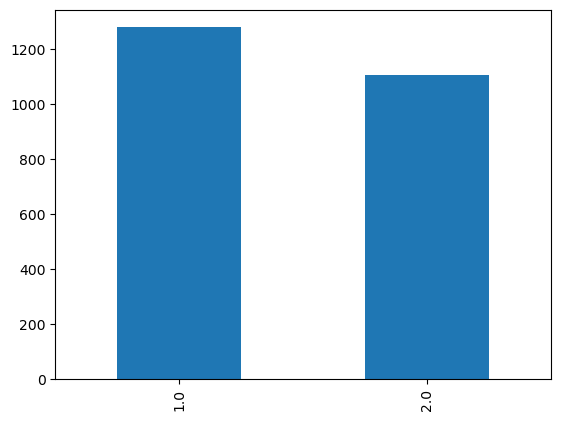

In [23]:
mid2['성별'].value_counts().plot(kind='bar') # 1 = 남성, 2 = 여성
plt.show()

In [24]:
df = mid2.copy()

In [25]:
df.columns

Index(['가구 ID', '개인 ID', '조사참여 여부: 청소년', '시/도(학교 기준)', '도시규모(학교 기준)',
       '시/도(거주지 기준)', '성별', '부모관계1', '부모관계2', '무능력1', '무능력2', '무능력3', '반감1',
       '반감2', '반감3', '냉담1', '냉담2', '탈진1', '탈진2', '탈진3', '탈진4', '자아존중감1',
       '자아존중감2', '자아존중감3', '자아존중감4', '자아존중감5', '자아존중감6', '자아존중감7', '자아존중감8',
       '자아존중감9', '자아존중감10', '주의집중1', '주의집중2', '주의집중3', '주의집중4', '주의집중5',
       '주의집중6', '주의집중7', '우울1', '우울2', '우울3', '우울4', '우울5', '우울6', '우울7',
       '우울8', '우울9', '우울10', '그릿1', '그릿2', '그릿3', '그릿4', '그릿5', '그릿6', '그릿7',
       '그릿8', '친구관계1', '친구관계2', '친구관계3', '친구관계4', '친구관계5', '친구관계6', '친구관계7',
       '친구관계8', '교사관계1', '교사관계2', '교사관계3', '교사관계4', '교사관계5', '교사관계6', '교사관계7',
       '교사관계8', '교사관계9', '교사관계10', '부모관계3', '부모관계4', '부모관계5', '부모관계6', '부모관계7',
       '부모관계8', '부모관계9', '부모관계10', '부모관계11', '부모관계12', '부모관계13', '부모관계14'],
      dtype='object')

In [26]:
c1 = pd.read_csv('요인.csv',encoding='cp949')

In [27]:
pr = df[['부모관계3','부모관계4','부모관계5','부모관계6','부모관계7','부모관계8','부모관계9','부모관계10','부모관계11','부모관계12','부모관계13','부모관계14']]

In [28]:
pr2 = c1[['부모관계3','부모관계4','부모관계5','부모관계6','부모관계7','부모관계8','부모관계9','부모관계10','부모관계11','부모관계12','부모관계13','부모관계14']]

In [29]:
m1 = pr2.mean(axis=1)

In [30]:
fr = df[['친구관계1', '친구관계2', '친구관계3', '친구관계4', '친구관계5', '친구관계6', '친구관계7','친구관계8']]

In [31]:
fr2 = c1[['친구관계1', '친구관계2', '친구관계3', '친구관계4', '친구관계5', '친구관계6', '친구관계7','친구관계8']]

In [32]:
m2 = fr2.mean(axis=1)

In [33]:
tr = df[['교사관계1', '교사관계2','교사관계3', '교사관계4', '교사관계5', '교사관계6', '교사관계7','교사관계8', '교사관계9', '교사관계10']]

In [34]:
tr2 = c1[['교사관계1', '교사관계2','교사관계3', '교사관계4', '교사관계5', '교사관계6', '교사관계7','교사관계8', '교사관계9', '교사관계10']]

In [35]:
m3 = tr2.mean(axis=1)

In [36]:
se = df[['자아존중감1', '자아존중감2', '자아존중감3','자아존중감4', '자아존중감5', '자아존중감6', '자아존중감7','자아존중감8', '자아존중감9', '자아존중감10']]

In [37]:
se2 = c1[['자아존중감1', '자아존중감2', '자아존중감3','자아존중감4', '자아존중감5', '자아존중감6', '자아존중감7','자아존중감8', '자아존중감9', '자아존중감10']]

In [38]:
m4 = se2.mean(axis=1)

In [39]:
depress= df[['우울1', '우울2', '우울3', '우울4', '우울5', '우울6', '우울7','우울8', '우울9', '우울10']]

In [40]:
depress2= c1[['우울1', '우울2', '우울3', '우울4', '우울5', '우울6', '우울7','우울8', '우울9', '우울10']]

In [41]:
m5 = depress2.mean(axis=1)

In [42]:
attention = df[[ '주의집중1', '주의집중2', '주의집중3', '주의집중4', '주의집중5','주의집중6', '주의집중7']]

In [43]:
attention2 = c1[[ '주의집중1', '주의집중2', '주의집중3', '주의집중4', '주의집중5','주의집중6', '주의집중7']]

In [44]:
m6 = attention2.mean(axis=1)

In [47]:
s1 =[[pr2,fr2,tr2,se2,depress2,attention2,grit2]]

In [49]:
s1

[[           부모관계3       부모관계4       부모관계5       부모관계6       부모관계7       부모관계8  \
  0     100.000000  100.000000  100.000000   66.666667  100.000000  100.000000   
  1      66.666667   66.666667   66.666667   66.666667   66.666667   66.666667   
  2      66.666667   66.666667   66.666667   66.666667  100.000000  100.000000   
  3     100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
  4      66.666667   66.666667   66.666667   33.333333   33.333333   33.333333   
  ...          ...         ...         ...         ...         ...         ...   
  2378   66.666667   66.666667   66.666667   66.666667   66.666667   66.666667   
  2379   66.666667   66.666667   66.666667   66.666667   66.666667   66.666667   
  2380   66.666667   66.666667   66.666667   66.666667   66.666667   66.666667   
  2381  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
  2382   66.666667   66.666667   66.666667   66.666667   33.333333   66.666667   
  
             

In [45]:
m6

0       47.619048
1       42.857143
2       14.285714
3       47.619048
4       57.142857
          ...    
2378    76.190476
2379     9.523810
2380    28.571429
2381    38.095238
2382    52.380952
Length: 2383, dtype: float64

In [45]:
grit = df[['그릿1', '그릿2', '그릿3', '그릿4', '그릿5', '그릿6', '그릿7','그릿8']]

In [46]:
grit2 = c1[['그릿1', '그릿2', '그릿3', '그릿4', '그릿5', '그릿6', '그릿7','그릿8']]

In [54]:
m7 = grit2.mean(axis=1)

In [51]:
csv = pd.concat([pr,fr,tr,se,depress,attention,grit],axis=1)

In [61]:
csv

,부모관계3,부모관계4,부모관계5,부모관계6,부모관계7,부모관계8,부모관계9,부모관계10,부모관계11,부모관계12,...,주의집중6,주의집중7,그릿1,그릿2,그릿3,그릿4,그릿5,그릿6,그릿7,그릿8
0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,...,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,...,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0
2,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,...,1.0,1.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,...,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0
6,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,...,3.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0
2584,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,1.0,3.0,...,1.0,1.0,2.0,4.0,1.0,4.0,2.0,1.0,3.0,2.0
2585,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,2.0,2.0,2.0,3.0,1.0,3.0,2.0,1.0,3.0,3.0
2586,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0


In [48]:
c1.columns

Index(['부모관계3', '부모관계4', '부모관계5', '부모관계6', '부모관계7', '부모관계8', '부모관계9', '부모관계10',
       '부모관계11', '부모관계12', '부모관계13', '부모관계14', '친구관계1', '친구관계2', '친구관계3',
       '친구관계4', '친구관계5', '친구관계6', '친구관계7', '친구관계8', '교사관계1', '교사관계2', '교사관계3',
       '교사관계4', '교사관계5', '교사관계6', '교사관계7', '교사관계8', '교사관계9', '교사관계10',
       '자아존중감1', '자아존중감2', '자아존중감3', '자아존중감4', '자아존중감5', '자아존중감6', '자아존중감7',
       '자아존중감8', '자아존중감9', '자아존중감10', '우울1', '우울2', '우울3', '우울4', '우울5', '우울6',
       '우울7', '우울8', '우울9', '우울10', '주의집중1', '주의집중2', '주의집중3', '주의집중4',
       '주의집중5', '주의집중6', '주의집중7', '그릿1', '그릿2', '그릿3', '그릿4', '그릿5', '그릿6',
       '그릿7', '그릿8'],
      dtype='object')

In [49]:
c2 = pd.read_csv('학업소진변환.csv',encoding='cp949')

In [50]:
c2 = c2.drop(['학업소진평균','학업소진총점'],axis=1)

In [51]:
#랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plot

In [55]:
data = pd.DataFrame([m1,m2,m3,m4,m5,m6,m7])

In [56]:
data

,0,1,2,3,4,5,6,7,8,9,...,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382
0,88.888889,58.333333,75.000000,91.666667,52.777778,52.777778,63.888889,66.666667,55.555556,88.888889,...,58.333333,47.222222,66.666667,63.888889,69.444444,58.333333,69.444444,63.888889,97.222222,66.666667
1,79.166667,70.833333,66.666667,62.500000,75.000000,58.333333,75.000000,66.666667,62.500000,70.833333,...,58.333333,54.166667,62.500000,50.000000,70.833333,29.166667,50.000000,75.000000,87.500000,37.500000
2,40.000000,40.000000,46.666667,63.333333,83.333333,46.666667,70.000000,66.666667,83.333333,80.000000,...,60.000000,76.666667,60.000000,60.000000,60.000000,40.000000,96.666667,70.000000,83.333333,76.666667
3,73.333333,46.666667,40.000000,56.666667,43.333333,46.666667,50.000000,60.000000,53.333333,6.666667,...,53.333333,53.333333,60.000000,56.666667,56.666667,60.000000,43.333333,50.000000,56.666667,46.666667
4,33.333333,26.666667,10.000000,46.666667,0.000000,16.666667,10.000000,46.666667,6.666667,16.666667,...,46.666667,66.666667,6.666667,50.000000,36.666667,46.666667,10.000000,0.000000,3.333333,40.000000
5,47.619048,42.857143,14.285714,47.619048,57.142857,23.809524,28.571429,66.666667,33.333333,47.619048,...,38.095238,71.428571,71.428571,61.904762,61.904762,76.190476,9.523810,28.571429,38.095238,52.380952
6,50.000000,50.000000,50.000000,50.000000,58.333333,58.333333,41.666667,58.333333,54.166667,50.000000,...,54.166667,62.500000,41.666667,41.666667,45.833333,50.000000,45.833333,41.666667,50.000000,58.333333


In [57]:
data = data.rename(index={0 :'부모관계',1:'친구관계',2:'교사관계',3:'자아존중감',4:'우울',5:'주의집중',6:'그릿'})

In [58]:
data = data.T

In [59]:
data

,부모관계,친구관계,교사관계,자아존중감,우울,주의집중,그릿
0,88.888889,79.166667,40.000000,73.333333,33.333333,47.619048,50.000000
1,58.333333,70.833333,40.000000,46.666667,26.666667,42.857143,50.000000
2,75.000000,66.666667,46.666667,40.000000,10.000000,14.285714,50.000000
3,91.666667,62.500000,63.333333,56.666667,46.666667,47.619048,50.000000
4,52.777778,75.000000,83.333333,43.333333,0.000000,57.142857,58.333333
...,...,...,...,...,...,...,...
2378,58.333333,29.166667,40.000000,60.000000,46.666667,76.190476,50.000000
2379,69.444444,50.000000,96.666667,43.333333,10.000000,9.523810,45.833333
2380,63.888889,75.000000,70.000000,50.000000,0.000000,28.571429,41.666667
2381,97.222222,87.500000,83.333333,56.666667,3.333333,38.095238,50.000000


In [60]:
r = c2.mean(axis=1)

In [61]:
data['학업소진'] = r

In [62]:
data

,부모관계,친구관계,교사관계,자아존중감,우울,주의집중,그릿,학업소진
0,88.888889,79.166667,40.000000,73.333333,33.333333,47.619048,50.000000,36.111111
1,58.333333,70.833333,40.000000,46.666667,26.666667,42.857143,50.000000,41.666667
2,75.000000,66.666667,46.666667,40.000000,10.000000,14.285714,50.000000,30.555556
3,91.666667,62.500000,63.333333,56.666667,46.666667,47.619048,50.000000,30.555556
4,52.777778,75.000000,83.333333,43.333333,0.000000,57.142857,58.333333,38.888889
...,...,...,...,...,...,...,...,...
2378,58.333333,29.166667,40.000000,60.000000,46.666667,76.190476,50.000000,63.888889
2379,69.444444,50.000000,96.666667,43.333333,10.000000,9.523810,45.833333,0.000000
2380,63.888889,75.000000,70.000000,50.000000,0.000000,28.571429,41.666667,22.222222
2381,97.222222,87.500000,83.333333,56.666667,3.333333,38.095238,50.000000,5.555556


In [63]:
import numpy as np
np.mean(data['학업소진'])

32.03361775445854

In [64]:
scaler = MinMaxScaler()

NameError: name 'MinMaxScaler' is not defined

In [65]:
#선형회귀분석
from sklearn.linear_model import LinearRegression
x = 
y = 
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)
> [3.88883297] [[2.98499978]]

print(lin_reg.predict(x_new))
>array([[3.88883297],
       [9.85883253]])

SyntaxError: invalid syntax (1821154195.py, line 3)

In [66]:
#랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plot

In [67]:
x = data[data.columns.difference(['학업소진'])]
y = data['학업소진']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1234)


In [90]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) # 데이터 개수 확인

(1668, 7) (715, 7) (1668,) (715,)


In [ ]:
for i in (10, 20, 30, 40, 100, 150,1000000):
  model = RandomForestRegressor(n_estimators = i, random_state = 100000)
  model.fit(x_train, y_train)

  relation_square = model.score(x_test,y_test)
  print('결정계수 : ', relation_square)
  
  y_p = model.predict(x_test)


결정계수 :  0.24941473257915636
결정계수 :  0.2941562165244026
결정계수 :  0.30653543758224766
결정계수 :  0.31371205749085185
결정계수 :  0.33273087369931686
결정계수 :  0.3371785361969232


In [ ]:
clf = RandomForestRegressor()
clf.fit(x_train,y_train)

In [ ]:
print(clf.score(x_train, y_train)) 

print(clf.score(x_test, y_test))

In [ ]:
predict1 = clf.predict(x_test)
print(accuracy_score(y_test,predict1))

In [ ]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=1234)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

In [ ]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'rfc'

In [ ]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_train,
                                                          y_train,
                                                          x_test,
                                                          y_test)

In [ ]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시

In [ ]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [ ]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

In [ ]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 1234)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

In [ ]:
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=1234)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

In [ ]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred,average='micro'):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred,average='micro'):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred,average='micro'):.3f}") # F1 스코어
    
    
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = ['학업소진평균'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵

    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"], family='AppleGothic')
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름


In [ ]:
n_estimator_min = 1
n_estimator_max = 40
optimi_estimator(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [ ]:
n_estimator = 17

In [ ]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                x_train, y_train, x_test, y_test, 
                depth_min, depth_max, n_estimator)

In [ ]:
n_depth = 4 
#테스트 데이터 기반 모델 정확도가 점차 증가하다가 감소하기 시작하는 구간으로, 최대 깊이 6을 최적의 값으로 선정하였습니다. 

In [ ]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 x_train, y_train, x_test, y_test,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [ ]:
n_split = 100 # 많을수록 좋고 가장 적은 차이를 보임 0.0011

In [ ]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               x_train, y_train, x_test, y_test, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [ ]:
n_leaf = 43

In [ ]:
feature_name = x.columns

In [ ]:
model_final(algorithm, algorithm_name, feature_name,
            x_train, y_train, x_test, y_test,
            n_estimator, n_depth, n_split, n_leaf)

In [ ]:
y_proba = clf.predict_proba(x_test)[:,1]
print("Roc AUC:", roc_auc_score(y_test, clf.predict_proba(x_test)[:,1],average='macro'))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)

In [79]:
stats.shapiro(data['학업소진'])
mu = 32.5
result = stats.ttest_1samp(data['학업소진'], mu)
print(result)

NameError: name 'stats' is not defined

In [80]:
data.describe(include='all')

,부모관계,친구관계,교사관계,자아존중감,우울,주의집중,그릿,학업소진
count,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000
mean,71.848044,68.366205,61.200168,51.733110,26.353336,37.919389,51.223947,32.033618
std,14.969805,15.312770,15.016407,8.405038,20.136087,18.622242,10.436546,17.145047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.888889,58.333333,53.333333,46.666667,10.000000,23.809524,45.833333,19.444444
50%,69.444444,66.666667,63.333333,53.333333,26.666667,38.095238,50.000000,33.333333
75%,83.333333,75.000000,66.666667,56.666667,36.666667,52.380952,58.333333,41.666667
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [81]:
def old_groups(values):
    if values >= 32:
        return 1
    else:
        return 0

In [82]:
dataB = data.copy()

In [83]:
dataB['학업소진'] = data['학업소진'].apply(old_groups)

In [84]:
data['학업소진'].mean()

32.03361775445854

In [85]:
dataB.to_csv("dataB.csv",index = False,encoding='cp949')

In [86]:
dataB

,부모관계,친구관계,교사관계,자아존중감,우울,주의집중,그릿,학업소진
0,88.888889,79.166667,40.000000,73.333333,33.333333,47.619048,50.000000,1
1,58.333333,70.833333,40.000000,46.666667,26.666667,42.857143,50.000000,1
2,75.000000,66.666667,46.666667,40.000000,10.000000,14.285714,50.000000,0
3,91.666667,62.500000,63.333333,56.666667,46.666667,47.619048,50.000000,0
4,52.777778,75.000000,83.333333,43.333333,0.000000,57.142857,58.333333,1
...,...,...,...,...,...,...,...,...
2378,58.333333,29.166667,40.000000,60.000000,46.666667,76.190476,50.000000,1
2379,69.444444,50.000000,96.666667,43.333333,10.000000,9.523810,45.833333,0
2380,63.888889,75.000000,70.000000,50.000000,0.000000,28.571429,41.666667,0
2381,97.222222,87.500000,83.333333,56.666667,3.333333,38.095238,50.000000,0


In [87]:
data.describe(include='all')

,부모관계,친구관계,교사관계,자아존중감,우울,주의집중,그릿,학업소진
count,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000
mean,71.848044,68.366205,61.200168,51.733110,26.353336,37.919389,51.223947,32.033618
std,14.969805,15.312770,15.016407,8.405038,20.136087,18.622242,10.436546,17.145047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.888889,58.333333,53.333333,46.666667,10.000000,23.809524,45.833333,19.444444
50%,69.444444,66.666667,63.333333,53.333333,26.666667,38.095238,50.000000,33.333333
75%,83.333333,75.000000,66.666667,56.666667,36.666667,52.380952,58.333333,41.666667
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib

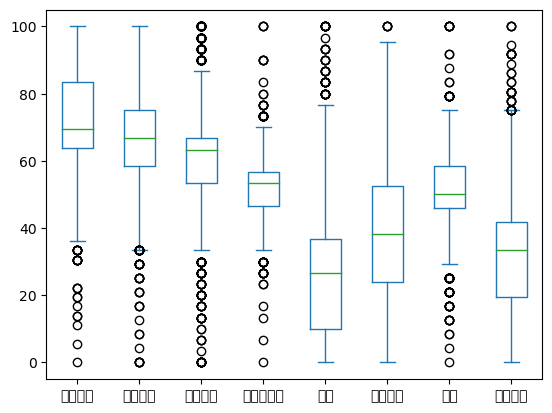

In [89]:
data.plot(kind='box')
plt.show()

In [90]:
dataB['학업소진'].value_counts() 

1    1251
0    1132
Name: 학업소진, dtype: int64

In [91]:
mid2['성별'].value_counts() 

1.0    1278
2.0    1105
Name: 성별, dtype: int64

In [92]:
scaler = StandardScaler()   # 객체 만들기


In [93]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=1234)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

In [101]:
x = dataB[dataB.columns.difference(['학업소진'])]

y = round(dataB['학업소진'])

x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.3, random_state = 123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) # 데이터 개수 확인

(1668, 7) (715, 7) (1668,) (715,)


In [95]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시

In [96]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [97]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

In [98]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 1234)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

In [99]:
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=1234)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

In [221]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred,average='micro'):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred,average='micro'):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred,average='micro'):.3f}") # F1 스코어
    
    
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = ['학업소진평균'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵

    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름


In [226]:
algorithm = RFC
algorithm_name = 'rfc'

In [227]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_train,
                                                          y_train,
                                                          x_test,
                                                          y_test)

학습 데이터셋 정확도: 0.999
테스트 데이터셋 정확도: 0.708


    n_estimators  TrainScore  TestScore
0              5      0.9556     0.6797
1             10      0.9790     0.6839
2             15      0.9934     0.6909
3             20      0.9970     0.6839
4             25      0.9988     0.7007
..           ...         ...        ...
94           475      0.9994     0.7063
95           480      0.9994     0.7049
96           485      0.9994     0.7021
97           490      0.9994     0.7021
98           495      0.9994     0.7007

[99 rows x 3 columns]


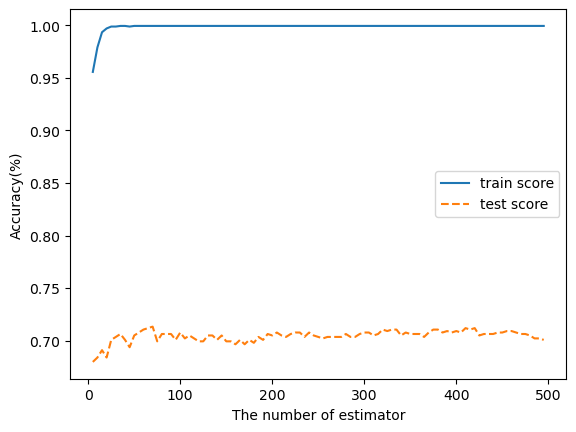

In [228]:
n_estimator_min = 1
n_estimator_max = 100
optimi_estimator(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

    n_estimators  TrainScore  TestScore
0              5      0.9556     0.6797
1             10      0.9790     0.6839
2             15      0.9934     0.6909
3             20      0.9970     0.6839
4             25      0.9988     0.7007
5             30      0.9988     0.7035
6             35      0.9994     0.7063
7             40      0.9994     0.7007
8             45      0.9988     0.6937
9             50      0.9994     0.7049
10            55      0.9994     0.7077
11            60      0.9994     0.7105
12            65      0.9994     0.7119
13            70      0.9994     0.7133
14            75      0.9994     0.6993
15            80      0.9994     0.7063
16            85      0.9994     0.7063
17            90      0.9994     0.7063
18            95      0.9994     0.7007
19           100      0.9994     0.7077


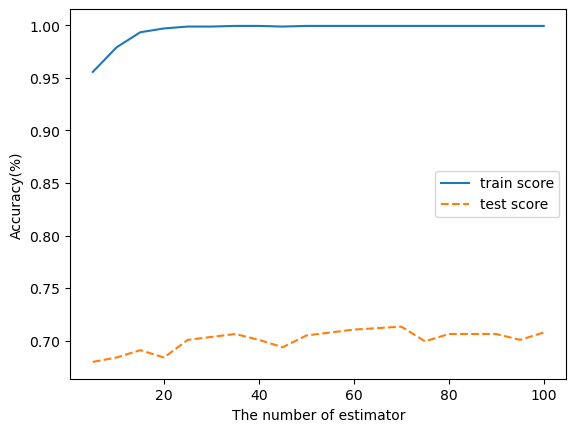

In [229]:
n_estimator_min = 1
n_estimator_max = 21
optimi_estimator(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [230]:
n_estimator = 13

    depth  TrainScore  TestScore
0       1      0.7026     0.7119
1       2      0.7074     0.7105
2       3      0.7146     0.7133
3       4      0.7284     0.7147
4       5      0.7416     0.7147
5       6      0.7758     0.7077
6       7      0.7956     0.7147
7       8      0.8483     0.6979
8       9      0.8585     0.6979
9      10      0.8999     0.7147
10     11      0.9263     0.7091
11     12      0.9466     0.6937
12     13      0.9622     0.6853
13     14      0.9694     0.7021
14     15      0.9778     0.6839
15     16      0.9844     0.6839
16     17      0.9814     0.6783
17     18      0.9838     0.6867
18     19      0.9892     0.6825
19     20      0.9874     0.7049


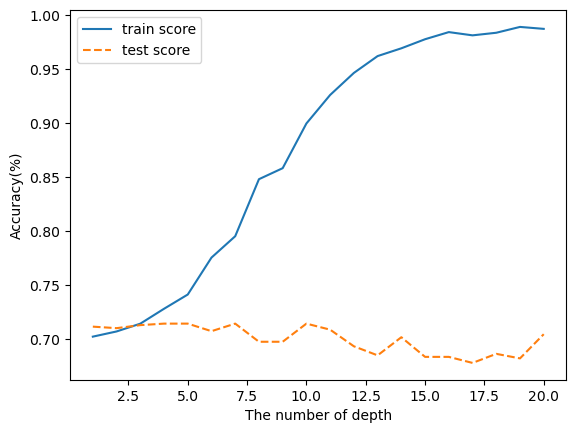

In [231]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                x_train, y_train, x_test, y_test, 
                depth_min, depth_max, n_estimator)

In [232]:
n_depth = 13

    min_samples_split  TrainScore  TestScore
0                   2      0.9622     0.6853
1                   4      0.9353     0.6839
2                   6      0.9137     0.6881
3                   8      0.8987     0.7077
4                  10      0.8747     0.6909
5                  12      0.8741     0.7133
6                  14      0.8555     0.7105
7                  16      0.8411     0.7021
8                  18      0.8303     0.6937
9                  20      0.8213     0.7049
10                 22      0.8243     0.7161
11                 24      0.8118     0.7105
12                 26      0.8004     0.7049
13                 28      0.8004     0.7133
14                 30      0.7896     0.6993
15                 32      0.7932     0.7063
16                 34      0.7902     0.7091
17                 36      0.7920     0.7063
18                 38      0.7848     0.7049
19                 40      0.7866     0.6993
20                 42      0.7716     0.7049
21        

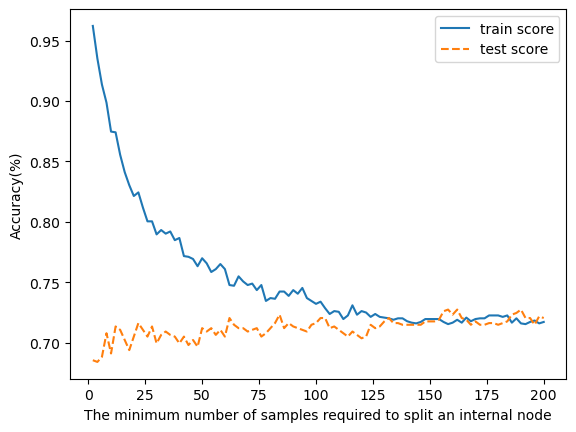

In [233]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 x_train, y_train, x_test, y_test,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [234]:
n_split = 81

    min_samples_leaf  TrainScore  TestScore
0                  2      0.7410     0.7091
1                  4      0.7410     0.7189
2                  6      0.7410     0.7203
3                  8      0.7362     0.7161
4                 10      0.7344     0.7161
5                 12      0.7278     0.7147
6                 14      0.7272     0.7161
7                 16      0.7248     0.7147
8                 18      0.7296     0.7175
9                 20      0.7290     0.7217
10                22      0.7272     0.7105
11                24      0.7236     0.7119
12                26      0.7248     0.7175
13                28      0.7236     0.7175
14                30      0.7212     0.7161
15                32      0.7218     0.7091
16                34      0.7242     0.7189
17                36      0.7230     0.7203
18                38      0.7248     0.7189
19                40      0.7260     0.7161
20                42      0.7224     0.7119
21                44      0.7290

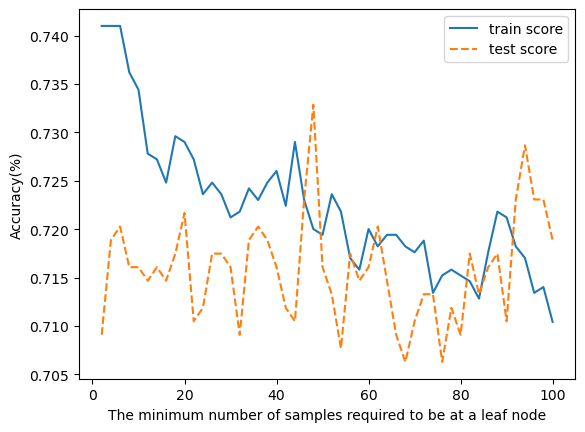

In [235]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               x_train, y_train, x_test, y_test, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [236]:
n_leaf = 34

In [237]:
feature_name = x.columns

In [244]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)

    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    
    
    


    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh('font'='AppleGothic',y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1236707577.py, line 42)

Accuracy: 0.719
Precision: 0.725
Recall: 0.768
F1-score: 0.746
  Feature  Importance
5    주의집중       0.340
3      우울       0.224
0    교사관계       0.199
2    부모관계       0.128
6    친구관계       0.073
1      그릿       0.019
4   자아존중감       0.017


AttributeError: 'Rectangle' object has no property 'family'

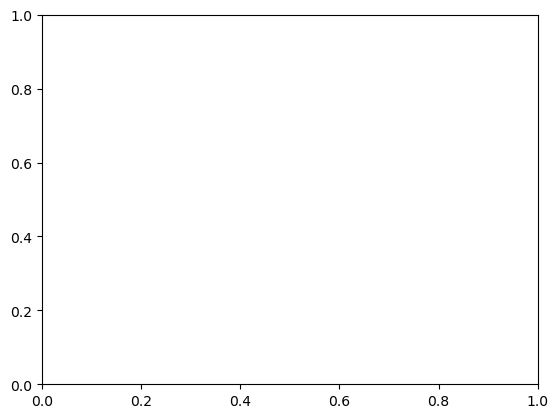

In [243]:
model_final(algorithm, algorithm_name, feature_name,
            x_train, y_train, x_test, y_test,
            n_estimator, n_depth, n_split, n_leaf)

In [224]:
    model = RFC(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)

    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    pred1 = model.predict(x_test)

NameError: name 'n_estimator' is not defined

In [193]:
from sklearn.metrics import r2_score, classification_report


Roc AUC: 0.7760180639476333


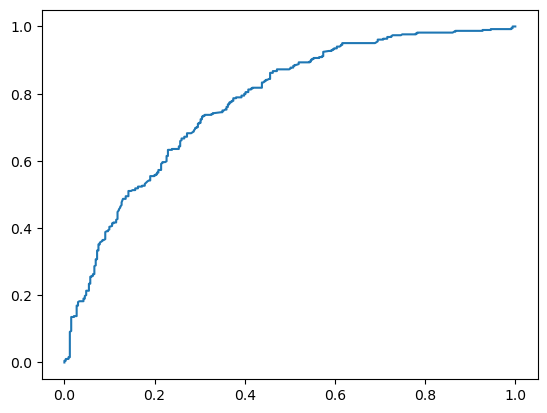

In [223]:
y_proba = model.predict_proba(x_test)[:,1]
print("Roc AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:,1],average='macro'))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)

In [139]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [140]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [160]:
model = abc.fit(x_train, y_train)

In [150]:
m = Adaboost(random_state=1234)
m.fit(x_train, y_train)
pred2 = m.predict(x_test)

NameError: name 'Adaboost' is not defined

In [142]:
print(classification_report(y_test,predicted))

NameError: name 'classification_report' is not defined

In [143]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

NameError: name 'predicted' is not defined

In [163]:
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(max_depth = 5)

In [179]:
clf2 = AdaBoostClassifier(base_estimator = base_model , n_estimators=500, random_state=20, learning_rate = 0.01)
clf2.fit(x_train, y_train) 
pred3=clf2.predict(x_test)
print(accuracy_score(y_test, pred3))

0.7146853146853147


In [180]:
print("Accuracy:",metrics.accuracy_score(y_test, pred3))
print(f"Precision: {precision_score(y_test, pred3,average='micro'):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, pred3,average='micro'):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, pred3,average='micro'):.3f}") # F1 스코어
    

Accuracy: 0.7146853146853147
Precision: 0.715
Recall: 0.715
F1-score: 0.715


Roc AUC: 0.7760180639476333


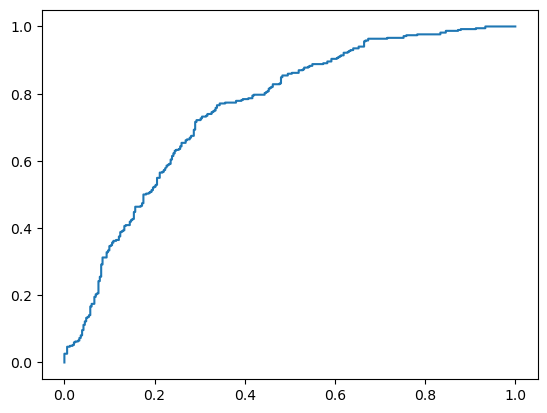

In [181]:
y_proba = clf2.predict_proba(x_test)[:,1]
print("Roc AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:,1],average='macro'))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)

In [203]:
algorithm = abc
algorithm_name = AdaBoostClassifier

In [204]:
scaler = StandardScaler()

In [206]:
scaler.fit(x_train)

StandardScaler()

In [207]:
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [213]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), \
                    solver='lbfgs', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=20)

In [214]:
mlp.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=32, hidden_layer_sizes=(10,),
              learning_rate_init=0.1, max_iter=20, solver='lbfgs')

In [215]:
predictions = mlp.predict(x_test)

In [216]:
print(confusion_matrix(y_test, predictions))

[[222 109]
 [ 88 296]]


In [217]:
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       331
           1       0.73      0.77      0.75       384

    accuracy                           0.72       715
   macro avg       0.72      0.72      0.72       715
weighted avg       0.72      0.72      0.72       715



In [219]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(f"Precision: {precision_score(y_test, predictions,average='micro'):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, predictions,average='micro'):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, predictions,average='micro'):.3f}") # F1 스코어

Accuracy: 0.7244755244755244
Precision: 0.724
Recall: 0.724
F1-score: 0.724


Roc AUC: 0.7760180639476333


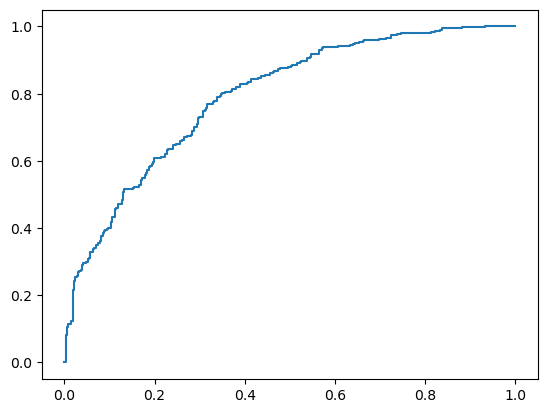

In [218]:
y_proba = mlp.predict_proba(x_test)[:,1]
print("Roc AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:,1],average='macro'))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)

In [182]:
from sklearn.neural_network import MLPClassifier

In [183]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), \
                    solver='lbfgs', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=20)  # 객체 생성

In [184]:
x_train2, x_val, y_train2, y_val = \
  train_test_split(x_train,y_train,stratify=y_train, \
                   test_size= 0.3,random_state=123)  # 훈련 데이터와 검증 데이터 분류

In [185]:
scaler = StandardScaler()   # 객체 만들기
scaler.fit(x_train2)     # 변환 규칙을 익히기
x_train_scaled = scaler.transform(x_train2)  # 데이터를 표준화 전처리
x_val_scaled = scaler.transform(x_val)      # 데이터를 표준화 전처리

In [186]:
mlp.fit(x_train_scaled, y_train2)    # 훈련하기

MLPClassifier(alpha=0.01, batch_size=32, hidden_layer_sizes=(10,),
              learning_rate_init=0.1, max_iter=20, solver='lbfgs')

In [187]:
mlp.score(x_val_scaled, y_val)      # 정확도 평가

0.656686626746507

In [197]:
mlp.score(x_val, y_val)   

0.656686626746507

In [201]:
from sklearn.metrics import classification_report, confusion_matrix

In [203]:
print(confusion_matrix(x_val_scaled, y_val))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [188]:
pred4=mlp.predict(x_test)

In [198]:
print("Accuracy:",metrics.accuracy_score(x_val, y_val))
print(f"Precision: {precision_score(x_val_scaled, y_val,average='micro'):.3f}") # 정밀도
print(f"Recall: {recall_score(x_val_scaled, y_val,average='micro'):.3f}") # 재현율
print(f"F1-score: {f1_score(x_val_scaled, y_val,average='micro'):.3f}") # F1 스코어

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

스태킹모델

In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [247]:
conda install tensorflow==2.0.0

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - ^C
failed with repodata from current_repodata.json, will retry with next repodata source.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [239]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #텐서플로우 v2 에서도 실행 가능하게 하기
tf.compat.v1.random.set_random_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기
from PIL import Image
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [107]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [108]:
import mglearn
import graphviz

In [119]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)


SyntaxError: positional argument follows keyword argument (3227651701.py, line 4)

In [216]:
from sklearn.linear_model import LogisticRegression

In [102]:
pred_all = np.array([pred1, pred2,pred4])
print(pred_all.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred_all = np.transpose(pred_all)
print(pred_all.shape)

# 최종 분류기 모델 생성
lr_final = LogisticRegression(C=10)

# 최종 분류기 학습 및 예측
lr_final.fit(pred_all, y_test)
final = lr_final.predict(pred_all)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

NameError: name 'pred1' is not defined